## 6.2 How to Plot it

### 6.2.1 Vertical Integral of  Water Vapour Flux

Similar to when we plotted the windfield, we start by averaging over the months of the year and selecting a specific month (january).

In [6]:
emt = ds.EMT.groupby('time.month').mean(dim = 'time').sel(month=1).load()
nmt = ds.NMT.groupby('time.month').mean(dim = 'time').sel(month=1).load()

Now plot the vectorfield with `quiver`:

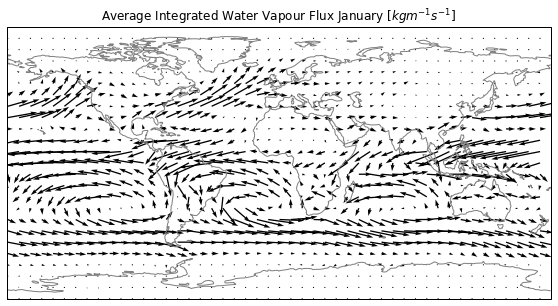

In [7]:
ax = plt.axes(projection=ccrs.PlateCarree())  
e, n = emt[::10,::10], nmt[::10,::10] #read 05_PlotWindData for explanations on this!
qv = ax.quiver(e.longitude, e.latitude, e, n, transform=ccrs.PlateCarree())
ax.coastlines(color='grey');
ax.set_title('Average Integrated Water Vapour Flux January [$kg m^{-1} s^{-1}$]');

As expected and mentioned above, the oceans are a source of water vapour and therfore a region where the water vapour flux diverges!

Again, we lack a discriptive information about the values of the depicted arrows. We can plot this as a shaded colour plot in the background.

Therefore, we must first determine the absolute values of the vectors:

In [8]:
av = np.sqrt(emt**2+nmt**2)
av

<xarray.DataArray (latitude: 241, longitude: 480)>
array([[0.060422, 0.060422, 0.060422, ..., 0.060422, 0.060422, 0.060422],
       [7.34272 , 7.337488, 7.336788, ..., 7.325745, 7.333013, 7.34357 ],
       [7.246943, 7.251859, 7.263371, ..., 7.233696, 7.238124, 7.243447],
       ...,
       [2.791576, 2.792091, 2.788807, ..., 2.799132, 2.796029, 2.794642],
       [2.464445, 2.464916, 2.461211, ..., 2.459049, 2.457595, 2.458315],
       [0.109705, 0.109705, 0.109705, ..., 0.109705, 0.109705, 0.109705]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
    month      int64 1

And now plot it:

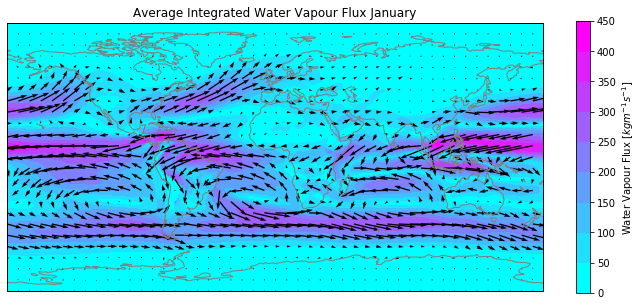

In [9]:
ax = plt.axes(projection=ccrs.PlateCarree())  
av.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels = 10, cmap='cool', cbar_kwargs={'label':'Water Vapour Flux [$kg m^{-1} s^{-1}$]'});
e, n = emt[::10,::10], nmt[::10,::10]
qv = ax.quiver(e.longitude, e.latitude, e, n, transform=ccrs.PlateCarree())
ax.coastlines(color='grey');
ax.set_title('Average Integrated Water Vapour Flux January');

We can also plot one of the vector components of the flux field in a 1D-plot! E.g. the northward water vapour flux, which is proportional to the energy transported by the latent heat flux. Values greater than zero indicate a northward transport, values smaller than zero a southward transport of water vapour and therefore latent heat.

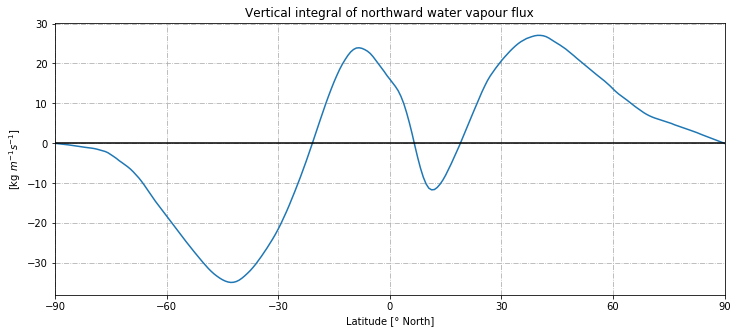

In [10]:
nmt_zonal = ds.NMT.mean(dim = ['time', 'longitude'])
nmt_zonal.plot()
plt.xlim(-90, 90) # defines the limits on the x-axis
plt.title('Vertical integral of northward water vapour flux') # plots your title
plt.ylabel('[kg $m^{-1}s^{-1}$]'); # changes the y-label from the default label to the one you want
plt.xlabel('Latitude [° North]');
plt.xticks((-90, -60, -30, 0, 30, 60, 90));
plt.axhline(0, color = 'k');
plt.grid(linestyle = '-.')

### 6.2.2 Vertical integral of divergence of water vapour flux

We can also plot the divergence of the flux we plotted above. Let's load the data first:

In [11]:
ds = xr.open_dataset('./data/ERA5-LowRes-MonthlyAvg-VertIntDivMoistFlux.nc')
ds = ds.rename({"p84.162" : "div"})
ds.div

<xarray.DataArray 'div' (time: 480, latitude: 241, longitude: 480)>
[55526400 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Attributes:
    units:      kg m**-2 s**-1
    long_name:  Vertical integral of divergence of moisture flux

Since it is a divergence of the moisture flux field, the unit changes from $kg m^{-1}s^{-1}$ to $kg m^{-2}s^{-1}$. We can transform this unit into $mm/day$ by multiplying it with $24\cdot60\cdot60$, the seconds of a day! This is a more intuitiv unit.

Let's do this and then plot it:

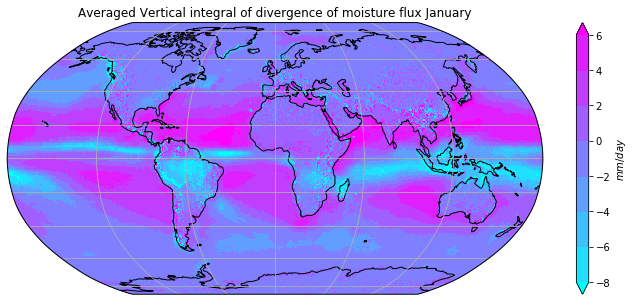

In [12]:
div_jan = ds.div.groupby('time.month').mean(dim = 'time').sel(month = 1)
div_jan = div_jan *24*60*60
ax = plt.axes(projection=ccrs.Robinson())
div_jan.plot(ax=ax, transform=ccrs.PlateCarree(), levels = np.arange(-8, 8, 2),vmin = -8, vmax= 8, cmap = 'cool', 
             cbar_kwargs={'label': '$mm/day$'}) 
ax.set_title('Averaged Vertical integral of divergence of moisture flux January')
ax.coastlines(); ax.gridlines();

The major source regions for atmospheric moisture can be identified in the subtropical anticyclones, and major sink regions in the convergence zones and summer monsoon rains (Trenberth et al., 2011). Trenberth furhtermore states, that the tendency term $\frac{\partial w}{\partial t}$ is very small for time averages. Therefore, one can take the divergence of the moisture flux as proportional to $E-P$. 